In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Smaller_DATASET_v2.csv')


In [4]:
# Check data type of the column Collaboration %
print(data['Collaboration %'].dtype)

# Convert to numeric if needed
data['Collaboration %'] = pd.to_numeric(data['Collaboration %'], errors='coerce')

int64


In [8]:
# Fill missing values with the mean
mean_collaboration = data['Collaboration %'].mean()
data['Collaboration %'].fillna(mean_collaboration, inplace=True)

In [12]:
print(data['Collaboration %'].describe())

count    1932.000000
mean       59.937888
std        25.448586
min        22.000000
25%        44.000000
50%        66.000000
75%        88.000000
max        94.000000
Name: Collaboration %, dtype: float64


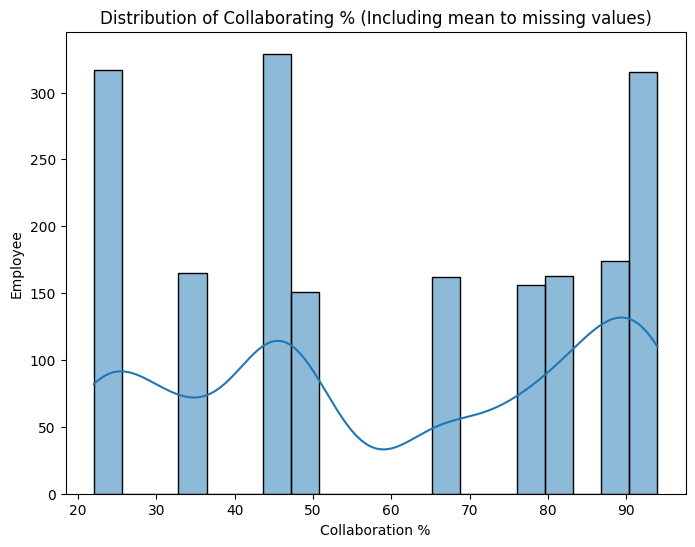

In [14]:
# Visualization (e.g., histogram) of 'collaboration %' after adding mean to the missing values
plt.figure(figsize=(8, 6))
sns.histplot(data['Collaboration %'], bins=20, kde=True)
plt.title('Distribution of Collaborating % (Including mean to missing values)')
plt.xlabel('Collaboration %')
plt.ylabel('Employee')
plt.show()

In [15]:
#Analysis of employees collaboration % according to their flexibility sentiment

#Checking data type and filling the missing values
print(data['Flexibility sentiment'].dtype)
data['Flexibility sentiment'].fillna('No Comments', inplace=True)

object


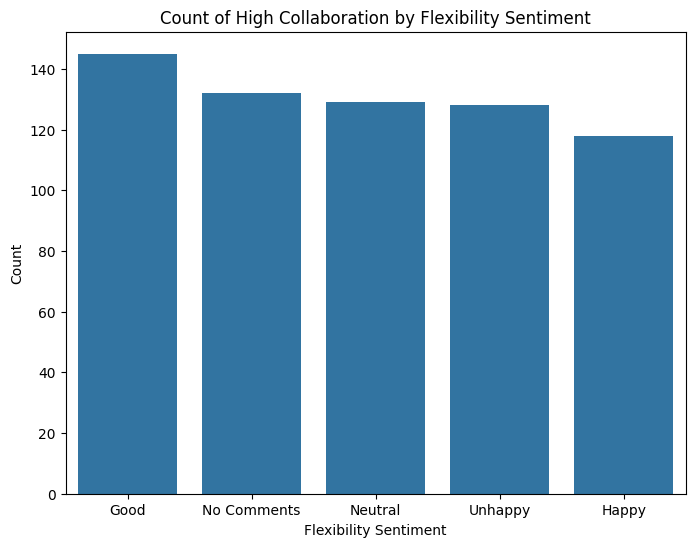

In [16]:
#Analysis of high collab % according to employee flexibility sentiments
#threshold for high collaboration percentage
high_collab_threshold = 80

# Filter data for individuals with high collaboration percentage
high_collab_data = data[data['Collaboration %'] > high_collab_threshold]

# Count of people with high collaboration based on flexibility sentiment
high_collab_counts = high_collab_data['Flexibility sentiment'].value_counts()

# Plotting the count for high collaboration based on flexibility sentiment
plt.figure(figsize=(8, 6))
sns.barplot(x=high_collab_counts.index, y=high_collab_counts.values)
plt.title('Count of High Collaboration by Flexibility Sentiment')
plt.xlabel('Flexibility Sentiment')
plt.ylabel('Count')
plt.show()

In [25]:
#Histogram of age group vs collaboration %

# Define bins and labels for age groups
bins = [20, 30, 40, 50, 60]
labels = ['20-30', '30-40', '40-50', '50-60']

# Create a new column 'Age Group' based on defined bins
data['Age Group'] = pd.cut(data['What is your age'], bins=bins, labels=labels)

# Group data by 'Age Group' and calculate collaboration percentage statistics
collab_by_age_group = data.groupby('Age Group')['Collaboration %'].mean().reset_index()


C:\Users\hasehajp\AppData\Local\Temp\ipykernel_31396\1743721857.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  collab_by_age_group = data.groupby('Age Group')['Collaboration %'].mean().reset_index()


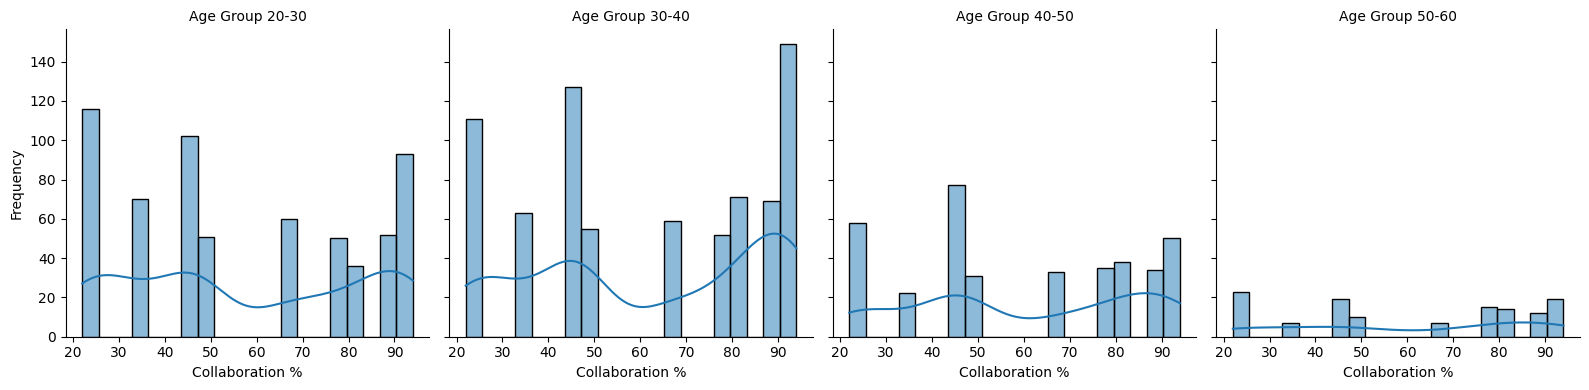

In [26]:
# Plotting histogram of collaboration percentages by age group
g = sns.FacetGrid(data, col='Age Group', col_wrap=4, height=4)
g.map(sns.histplot, 'Collaboration %', bins=20, kde=True)
g.set_titles('Age Group {col_name}')
g.set_xlabels('Collaboration %')
g.set_ylabels('Frequency')
plt.show()

In [33]:
print(data['What country do you work in'].dtype)
data['What country do you work in'].fillna('NA', inplace=True)

# Selecting relevant columns for analysis
columns_of_interest = ['Well-Being rating', 'Flexibility sentiment', 'What country do you work in']

# Filtering data for rows with non-null values in these columns
data_subset = data.dropna(subset=columns_of_interest)

object


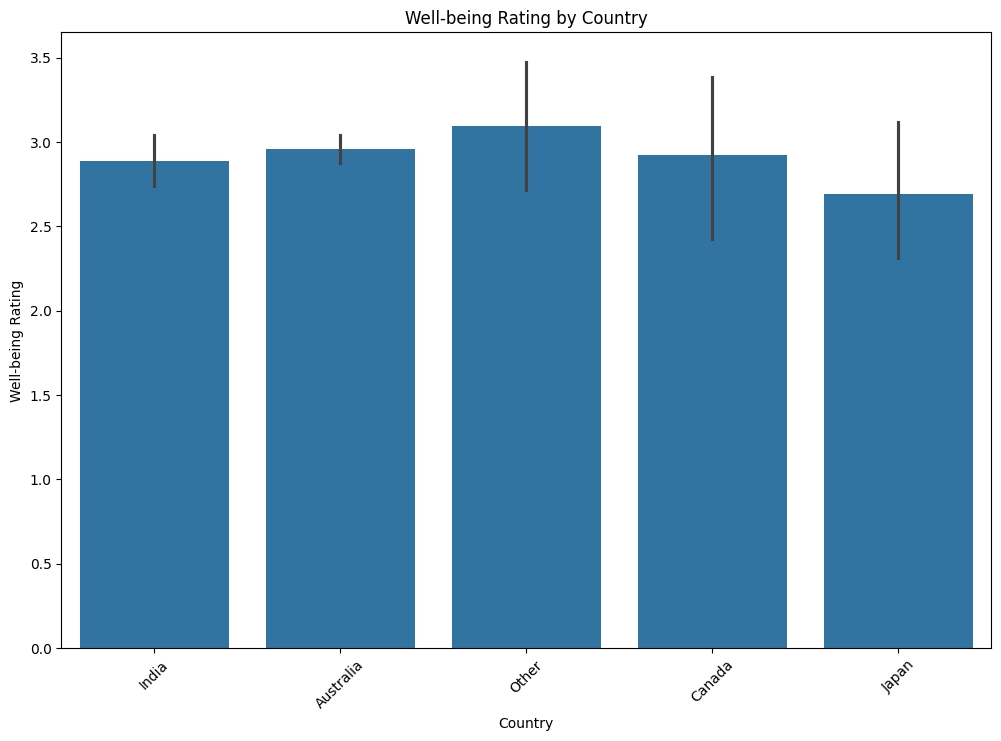

In [43]:
# Boxplot for Well-being Rating by Country
plt.figure(figsize=(12, 8))
sns.barplot(x='What country do you work in', y='Well-Being rating', data=data_subset)
plt.title('Well-being Rating by Country')
plt.xlabel('Country')
plt.ylabel('Well-being Rating')
plt.xticks(rotation=45)
plt.show()

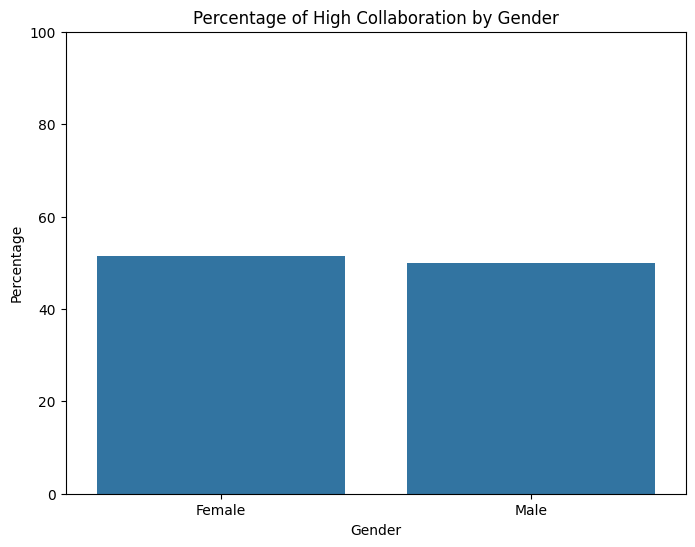

In [64]:
# Calculate percentage of individuals with high collaboration by gender
high_collab_threshold = 65

# Calculate percentages
total_females = data[data['What is your gender '] == 'Female'].shape[0]
high_collab_females = data[(data['What is your gender '] == 'Female') & (data['Collaboration %'] > high_collab_threshold)].shape[0]
percent_high_collab_females = (high_collab_females / total_females) * 100

total_males = data[data['What is your gender '] == 'Male'].shape[0]
high_collab_males = data[(data['What is your gender '] == 'Male') & (data['Collaboration %'] > high_collab_threshold)].shape[0]
percent_high_collab_males = (high_collab_males / total_males) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Female', 'Male'], y=[percent_high_collab_females, percent_high_collab_males])
plt.title('Percentage of High Collaboration by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

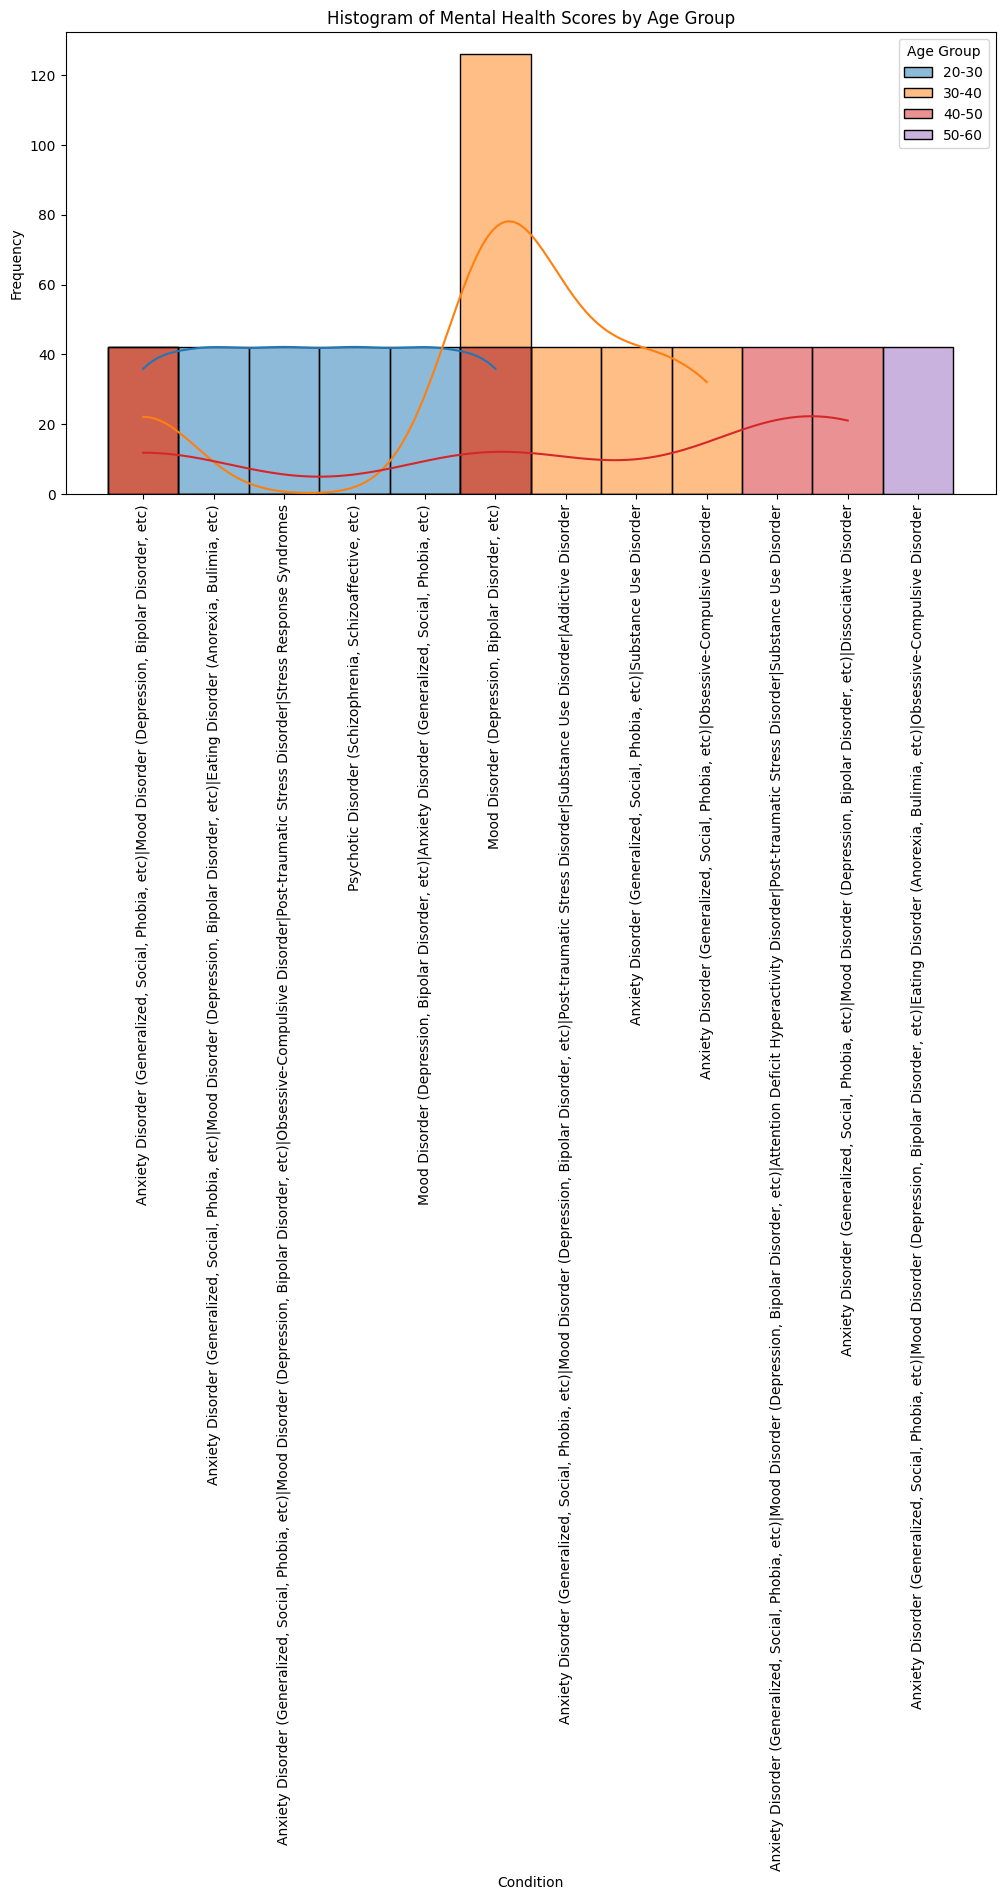

In [70]:
filtered_data = data[(data['Do you currently have a mental health disorder'] == 'Yes') & (data['If yes, what conditions have you been diagnosed with'].notnull())]
# Histogram for Mental Health/disorder by Age Group
plt.figure(figsize=(12, 6))
for age_group in data['Age Group'].unique():
    sns.histplot(data=data[data['Age Group'] == age_group]['If yes, what conditions have you been diagnosed with'], bins=20, kde=True, label=age_group)

plt.title('Histogram of Mental Health Scores by Age Group')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Age Group')
plt.show()

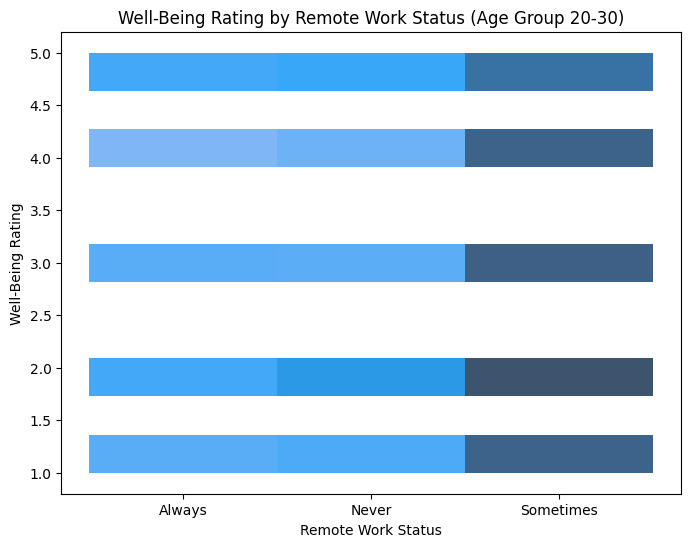

In [79]:
# Filter data for respondents aged between 20 and 35
filtered_data_20_30 = data[(data['What is your age'] >= 20) & (data['What is your age'] <= 35)]

# Box plot for Well-Being Rating by Remote Work Status for Age Group 20-30
plt.figure(figsize=(8, 6))
sns.histplot(x='Do you work remotely', y='Well-Being rating', data=filtered_data_20_30)
plt.title('Well-Being Rating by Remote Work Status (Age Group 20-30)')
plt.xlabel('Remote Work Status')
plt.ylabel('Well-Being Rating')
plt.show()

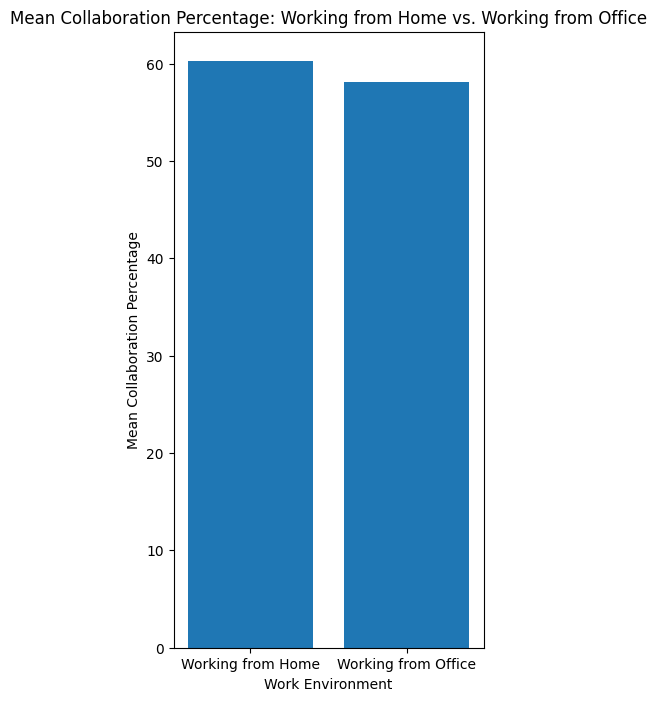

In [89]:
#Analyzing Collaboration While Working from Home vs. Office:

# Filter data for respondents working remotely and in the office
working_from_home = data[(data['Do you work remotely'] == 'Always') | (data['Do you work remotely'] == 'Sometimes')]
working_from_office = data[data['Do you work remotely'] == 'Never']

# Calculate mean collaboration percentages for both groups
mean_collab_from_home = working_from_home['Collaboration %'].mean()
mean_collab_from_office = working_from_office['Collaboration %'].mean()

# Create a bar plot for mean collaboration percentages
plt.figure(figsize=(4, 8))
plt.bar(['Working from Home', 'Working from Office'], [mean_collab_from_home, mean_collab_from_office])
plt.title('Mean Collaboration Percentage: Working from Home vs. Working from Office')
plt.xlabel('Work Environment')
plt.ylabel('Mean Collaboration Percentage')
plt.show()